In [ ]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


### **Plotting 10 first images:**

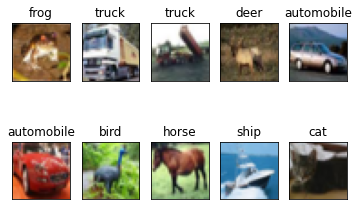

In [ ]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.title('{}'.format(labels[y_train[i][0]]))
plt.show()

### **Preprocessing:**

Normalization and splitting data into train, test and validation

In [ ]:
# Normalize:
x_train, x_test = x_train/np.max(x_train), x_test/np.max(x_test)
# Validation data:
split_index = 45000
x_valid = x_train[split_index:]
y_valid = y_train[split_index:]
x_train = x_train[:split_index] 
y_train = y_train[:split_index]

### **Training the Network:**

In [ ]:
import numpy as np 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
Network = Sequential()
Network.add(Flatten())                                             # Input layer
Network.add(Dense(128, input_dim = 32*32*3, activation = 'relu'))  # Hidden layer 1
Network.add(Dense(128, activation = 'relu'))                       # Hidden layer 2
Network.add(Dense(10, activation = 'softmax'))                     # Output layer

## **Section A: MLP Network**

### **Part 1.**

**Batch size = 32**

In [ ]:
lr = 1e-2
landa = 0.9
Network.compile(optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = landa), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Network.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_data = (x_valid, y_valid))

Epoch 1/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8996 - accuracy: 0.3075 - val_loss: 1.8021 - val_accuracy: 0.3440
Epoch 2/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.7528 - accuracy: 0.3685 - val_loss: 1.7371 - val_accuracy: 0.3830
Epoch 3/10
1407/1407 [==============================] - 16s 11ms/step - loss: 1.7025 - accuracy: 0.3858 - val_loss: 1.6875 - val_accuracy: 0.3950
Epoch 4/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6691 - accuracy: 0.4002 - val_loss: 1.6564 - val_accuracy: 0.4108
Epoch 5/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6364 - accuracy: 0.4126 - val_loss: 1.6733 - val_accuracy: 0.3954
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6144 - accuracy: 0.4238 - val_loss: 1.6516 - val_accuracy: 0.4112
Epoch 7/10
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5848 - accuracy: 0.4308 - val_loss: 1.5647 - val_accu

**PLotting accuracy and loss for train and validation data:**

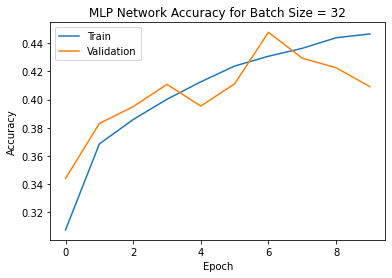

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP Network Accuracy for Batch Size = 32')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

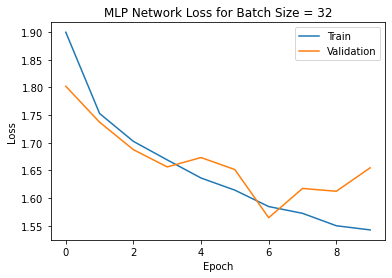

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP Network Loss for Batch Size = 32')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

**Batch size = 64**

In [ ]:
Network = Sequential()
Network.add(Flatten())                                             # Input layer
Network.add(Dense(128, input_dim = 32*32*3, activation = 'relu'))  # Hidden layer 1
Network.add(Dense(128, activation = 'relu'))                       # Hidden layer 2
Network.add(Dense(10, activation = 'softmax'))                     # Output layer

Network.compile(optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = landa), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Network.fit(x_train, y_train, epochs = 10, batch_size = 64, validation_data = (x_valid, y_valid))

Epoch 1/10
704/704 [==============================] - 5s 7ms/step - loss: 1.8751 - accuracy: 0.3211 - val_loss: 1.7721 - val_accuracy: 0.3652
Epoch 2/10
704/704 [==============================] - 5s 7ms/step - loss: 1.6971 - accuracy: 0.3890 - val_loss: 1.6886 - val_accuracy: 0.3972
Epoch 3/10
704/704 [==============================] - 5s 7ms/step - loss: 1.6219 - accuracy: 0.4189 - val_loss: 1.5845 - val_accuracy: 0.4384
Epoch 4/10
704/704 [==============================] - 6s 9ms/step - loss: 1.5672 - accuracy: 0.4383 - val_loss: 1.6061 - val_accuracy: 0.4284
Epoch 5/10
704/704 [==============================] - 5s 7ms/step - loss: 1.5315 - accuracy: 0.4525 - val_loss: 1.5379 - val_accuracy: 0.4508
Epoch 6/10
704/704 [==============================] - 6s 8ms/step - loss: 1.5093 - accuracy: 0.4586 - val_loss: 1.5979 - val_accuracy: 0.4392
Epoch 7/10
704/704 [==============================] - 5s 7ms/step - loss: 1.4950 - accuracy: 0.4649 - val_loss: 1.5255 - val_accuracy: 0.4706
Epoch 

**PLotting accuracy and loss for train and validation data:**

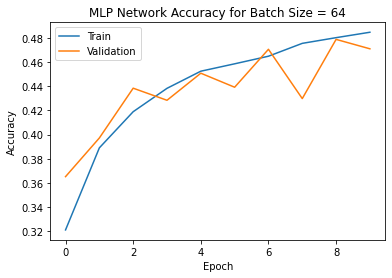

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP Network Accuracy for Batch Size = 64')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

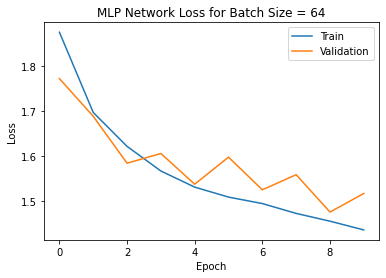

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP Network Loss for Batch Size = 64')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

**Batch size = 256**

In [ ]:
Network = Sequential()
Network.add(Flatten())                                             # Input layer
Network.add(Dense(128, input_dim = 32*32*3, activation = 'relu'))  # Hidden layer 1
Network.add(Dense(128, activation = 'relu'))                       # Hidden layer 2
Network.add(Dense(10, activation = 'softmax'))                     # Output layer

Network.compile(optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = landa), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Network.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_data = (x_valid, y_valid))

Epoch 1/10
176/176 [==============================] - 4s 18ms/step - loss: 1.9266 - accuracy: 0.3076 - val_loss: 1.7986 - val_accuracy: 0.3552
Epoch 2/10
176/176 [==============================] - 3s 16ms/step - loss: 1.7299 - accuracy: 0.3844 - val_loss: 1.7006 - val_accuracy: 0.3992
Epoch 3/10
176/176 [==============================] - 3s 16ms/step - loss: 1.6434 - accuracy: 0.4157 - val_loss: 1.6361 - val_accuracy: 0.4226
Epoch 4/10
176/176 [==============================] - 3s 16ms/step - loss: 1.5894 - accuracy: 0.4378 - val_loss: 1.5909 - val_accuracy: 0.4350
Epoch 5/10
176/176 [==============================] - 3s 16ms/step - loss: 1.5499 - accuracy: 0.4502 - val_loss: 1.5665 - val_accuracy: 0.4444
Epoch 6/10
176/176 [==============================] - 3s 16ms/step - loss: 1.5161 - accuracy: 0.4627 - val_loss: 1.5550 - val_accuracy: 0.4444
Epoch 7/10
176/176 [==============================] - 3s 16ms/step - loss: 1.4924 - accuracy: 0.4737 - val_loss: 1.5043 - val_accuracy: 0.4686

**PLotting accuracy and loss for train and validation data:**

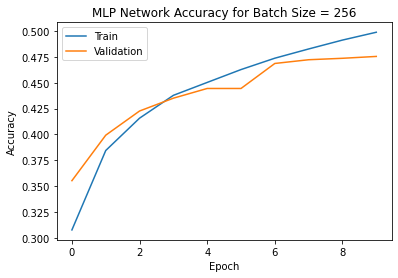

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP Network Accuracy for Batch Size = 256')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

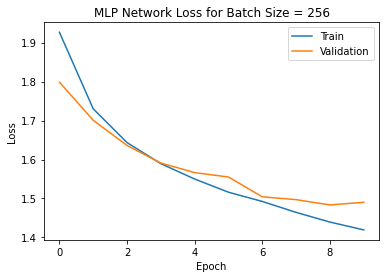

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP Network Loss for Batch Size = 256')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

## **Part 2.**

Before changing the activation functions, we calculate the parameters for the current network:

Hidden layer 1 --> relu

Hidden layer 2 --> relu

Output layer --> softmax

**Calculate accuracy, loss and confusion matrix for test data:**

Loss = 1.476
Accuracy = 0.477
313/313 [==============================] - 1s 2ms/step


Text(0.5, 1.0, 'Confusion matrix for the initial network')

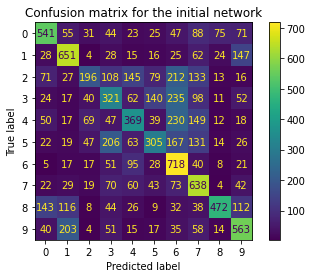

In [ ]:
test_loss, test_acc = Network.evaluate(x_test, y_test, verbose = 0)
print('Loss = %.3f' %test_loss)
print('Accuracy = %.3f' %test_acc)

y_pred = Network.predict(x_test)
y_pred = y_pred.argmax(1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix for the initial network')

**State (1):**

Hidden layer 1 --> sigmoid

Hidden layer 2 --> relu

Output layer --> softmax

In [ ]:
Network = Sequential()
Network.add(Flatten())                                                  # Input layer
Network.add(Dense(128, input_dim = 32*32*3, activation = 'sigmoid'))    # Hidden layer 1
Network.add(Dense(128, activation = 'relu'))                            # Hidden layer 2
Network.add(Dense(10, activation = 'softmax'))                          # Output layer

In [ ]:
Network.compile(optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = landa), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Network.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_data = (x_valid, y_valid))

Epoch 1/10
176/176 [==============================] - 6s 27ms/step - loss: 2.0907 - accuracy: 0.2481 - val_loss: 1.9386 - val_accuracy: 0.3180
Epoch 2/10
176/176 [==============================] - 3s 17ms/step - loss: 1.8826 - accuracy: 0.3348 - val_loss: 1.8425 - val_accuracy: 0.3440
Epoch 3/10
176/176 [==============================] - 3s 17ms/step - loss: 1.8117 - accuracy: 0.3589 - val_loss: 1.7930 - val_accuracy: 0.3766
Epoch 4/10
176/176 [==============================] - 3s 17ms/step - loss: 1.7660 - accuracy: 0.3768 - val_loss: 1.7630 - val_accuracy: 0.3856
Epoch 5/10
176/176 [==============================] - 3s 17ms/step - loss: 1.7246 - accuracy: 0.3906 - val_loss: 1.7347 - val_accuracy: 0.3940
Epoch 6/10
176/176 [==============================] - 3s 17ms/step - loss: 1.6936 - accuracy: 0.4026 - val_loss: 1.6952 - val_accuracy: 0.4050
Epoch 7/10
176/176 [==============================] - 3s 17ms/step - loss: 1.6584 - accuracy: 0.4150 - val_loss: 1.6910 - val_accuracy: 0.3990

**PLotting accuracy and loss for train and validation data:**

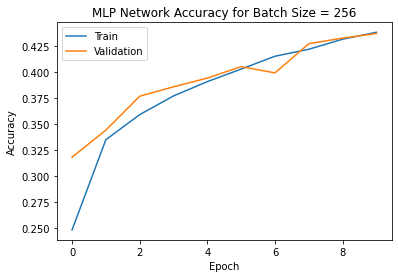

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP Network Accuracy for Batch Size = 256')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

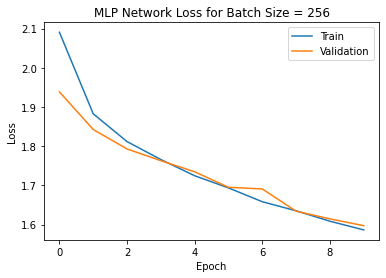

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP Network Loss for Batch Size = 256')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

**Calculate accuracy, loss and confusion matrix for test data:**

Loss = 1.581
Accuracy = 0.439
313/313 [==============================] - 1s 3ms/step


Text(0.5, 1.0, 'Confusion matrix for state 1')

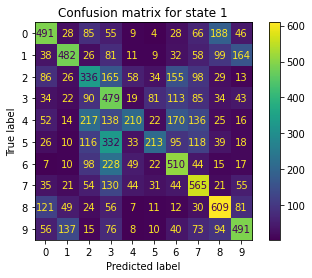

In [ ]:
test_loss, test_acc = Network.evaluate(x_test, y_test, verbose = 0)
print('Loss = %.3f' %test_loss)
print('Accuracy = %.3f' %test_acc)

y_pred = Network.predict(x_test)
y_pred = y_pred.argmax(1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix for state 1')

**State (2):**

Hidden layer 1 --> tanh

Hidden layer 2 --> relu

Output layer --> softmax

In [ ]:
Network = Sequential()
Network.add(Flatten())                                               # Input layer
Network.add(Dense(128, input_dim = 32*32*3, activation = 'tanh'))    # Hidden layer 1
Network.add(Dense(128, activation = 'relu'))                         # Hidden layer 2
Network.add(Dense(10, activation = 'softmax'))                       # Output layer

In [ ]:
Network.compile(optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = landa), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Network.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_data = (x_valid, y_valid))

Epoch 1/10
176/176 [==============================] - 4s 18ms/step - loss: 1.8986 - accuracy: 0.3184 - val_loss: 1.7814 - val_accuracy: 0.3762
Epoch 2/10
176/176 [==============================] - 3s 17ms/step - loss: 1.7099 - accuracy: 0.3932 - val_loss: 1.7088 - val_accuracy: 0.3980
Epoch 3/10
176/176 [==============================] - 4s 25ms/step - loss: 1.6244 - accuracy: 0.4220 - val_loss: 1.6361 - val_accuracy: 0.4198
Epoch 4/10
176/176 [==============================] - 3s 17ms/step - loss: 1.5681 - accuracy: 0.4472 - val_loss: 1.5656 - val_accuracy: 0.4472
Epoch 5/10
176/176 [==============================] - 3s 17ms/step - loss: 1.5350 - accuracy: 0.4548 - val_loss: 1.5401 - val_accuracy: 0.4568
Epoch 6/10
176/176 [==============================] - 3s 17ms/step - loss: 1.5045 - accuracy: 0.4664 - val_loss: 1.5105 - val_accuracy: 0.4668
Epoch 7/10
176/176 [==============================] - 3s 17ms/step - loss: 1.4721 - accuracy: 0.4766 - val_loss: 1.5002 - val_accuracy: 0.4678

**PLotting accuracy and loss for train and validation data:**

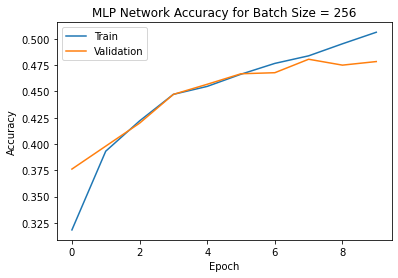

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP Network Accuracy for Batch Size = 256')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

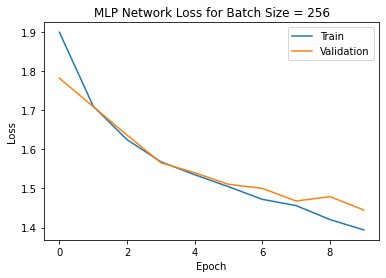

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP Network Loss for Batch Size = 256')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

**Calculate accuracy, loss and confusion matrix for test data:**

Loss = 1.439
Accuracy = 0.490
313/313 [==============================] - 1s 2ms/step


Text(0.5, 1.0, 'Confusion matrix for state 2')

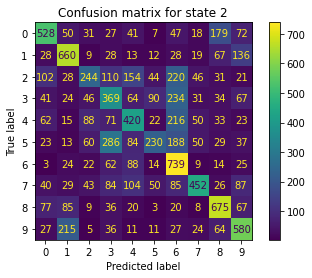

In [ ]:
test_loss, test_acc = Network.evaluate(x_test, y_test, verbose = 0)
print('Loss = %.3f' %test_loss)
print('Accuracy = %.3f' %test_acc)

y_pred = Network.predict(x_test)
y_pred = y_pred.argmax(1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix for state 2')

**State (3):**

Hidden layer 1 --> tanh

Hidden layer 2 --> tanh

Output layer --> softmax

In [ ]:
Network = Sequential()
Network.add(Flatten())                                                # Input layer
Network.add(Dense(128, input_dim = 32*32*3, activation = 'tanh'))     # Hidden layer 1
Network.add(Dense(128, activation = 'tanh'))                          # Hidden layer 2
Network.add(Dense(10, activation = 'softmax'))                        # Output layer

In [ ]:
Network.compile(optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = landa), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Network.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_data = (x_valid, y_valid))

Epoch 1/10
176/176 [==============================] - 4s 19ms/step - loss: 1.9110 - accuracy: 0.3147 - val_loss: 1.7730 - val_accuracy: 0.3672
Epoch 2/10
176/176 [==============================] - 3s 17ms/step - loss: 1.7193 - accuracy: 0.3924 - val_loss: 1.6677 - val_accuracy: 0.4214
Epoch 3/10
176/176 [==============================] - 3s 17ms/step - loss: 1.6445 - accuracy: 0.4188 - val_loss: 1.6651 - val_accuracy: 0.4100
Epoch 4/10
176/176 [==============================] - 3s 17ms/step - loss: 1.5918 - accuracy: 0.4344 - val_loss: 1.6163 - val_accuracy: 0.4306
Epoch 5/10
176/176 [==============================] - 3s 17ms/step - loss: 1.5591 - accuracy: 0.4487 - val_loss: 1.6015 - val_accuracy: 0.4290
Epoch 6/10
176/176 [==============================] - 3s 17ms/step - loss: 1.5298 - accuracy: 0.4572 - val_loss: 1.5710 - val_accuracy: 0.4538
Epoch 7/10
176/176 [==============================] - 3s 17ms/step - loss: 1.4954 - accuracy: 0.4721 - val_loss: 1.5296 - val_accuracy: 0.4612

**PLotting accuracy and loss for train and validation data:**

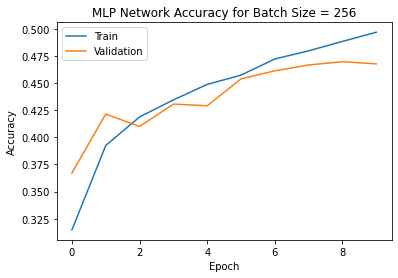

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP Network Accuracy for Batch Size = 256')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

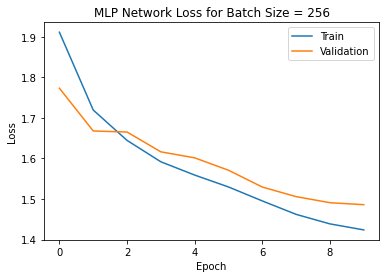

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP Network Loss for Batch Size = 256')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

**Calculate accuracy, loss and confusion matrix for test data:**

Loss = 1.481
Accuracy = 0.467
313/313 [==============================] - 1s 3ms/step


Text(0.5, 1.0, 'Confusion matrix for state 3')

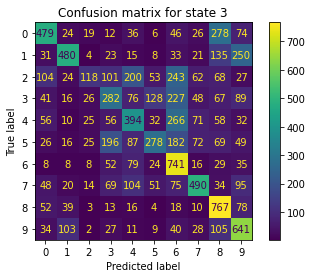

In [ ]:
test_loss, test_acc = Network.evaluate(x_test, y_test, verbose = 0)
print('Loss = %.3f' %test_loss)
print('Accuracy = %.3f' %test_acc)

y_pred = Network.predict(x_test)
y_pred = y_pred.argmax(1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix for state 3')

## **Part 3.**

In [ ]:
## Define the best network achieved from previous part:
Network = Sequential()
Network.add(Flatten())                                               # Input layer
Network.add(Dense(128, input_dim = 32*32*3, activation = 'relu'))    # Hidden layer 1
Network.add(Dense(128, activation = 'relu'))                         # Hidden layer 2
Network.add(Dense(10, activation = 'softmax'))                       # Output layer

**State (1):**

Loss = Poisson loss

In [ ]:
Network.compile(optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = landa), loss = tf.keras.losses.Poisson(), metrics = ['accuracy'])
history = Network.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_data = (x_valid, y_valid))

Epoch 1/10
176/176 [==============================] - 4s 18ms/step - loss: 10.4561 - accuracy: 0.0971 - val_loss: 10.5702 - val_accuracy: 0.1018
Epoch 2/10
176/176 [==============================] - 3s 17ms/step - loss: 10.4499 - accuracy: 0.0965 - val_loss: 10.5700 - val_accuracy: 0.0964
Epoch 3/10
176/176 [==============================] - 3s 18ms/step - loss: 10.4497 - accuracy: 0.0985 - val_loss: 10.5699 - val_accuracy: 0.0970
Epoch 4/10
176/176 [==============================] - 3s 17ms/step - loss: 10.4497 - accuracy: 0.0968 - val_loss: 10.5699 - val_accuracy: 0.0994
Epoch 5/10
176/176 [==============================] - 3s 17ms/step - loss: 10.4497 - accuracy: 0.0984 - val_loss: 10.5699 - val_accuracy: 0.1006
Epoch 6/10
176/176 [==============================] - 3s 17ms/step - loss: 10.4496 - accuracy: 0.1015 - val_loss: 10.5699 - val_accuracy: 0.1026
Epoch 7/10
176/176 [==============================] - 3s 17ms/step - loss: 10.4496 - accuracy: 0.1018 - val_loss: 10.5699 - val_ac

**PLotting accuracy and loss for train and validation data:**

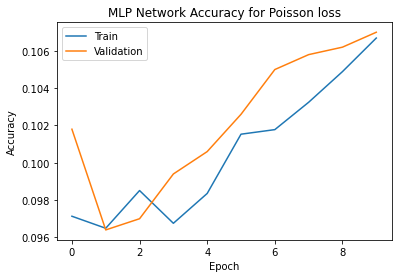

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP Network Accuracy for Poisson loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

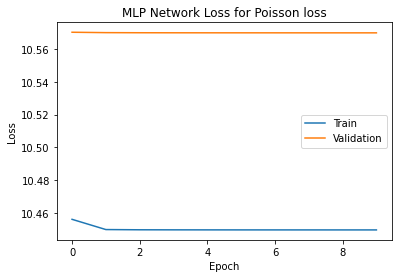

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP Network Loss for Poisson loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

**Calculate accuracy, loss and confusion matrix for test data:**

Loss = 10.462
Accuracy = 0.107
313/313 [==============================] - 1s 2ms/step


Text(0.5, 1.0, 'Confusion matrix for Poisson loss')

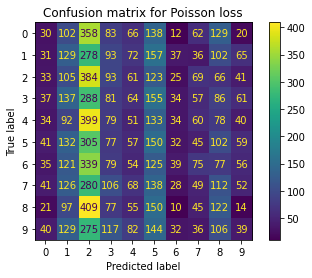

In [ ]:
test_loss, test_acc = Network.evaluate(x_test, y_test, verbose = 0)
print('Loss = %.3f' %test_loss)
print('Accuracy = %.3f' %test_acc)

y_pred = Network.predict(x_test)
y_pred = y_pred.argmax(1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix for Poisson loss')

**State (2):**

Loss = Mean Squared Error

In [ ]:
Network = Sequential()
Network.add(Flatten())                                             # Input layer
Network.add(Dense(128, input_dim = 32*32*3, activation = 'relu'))  # Hidden layer 1
Network.add(Dense(128, activation = 'relu'))                       # Hidden layer 2
Network.add(Dense(10, activation = 'softmax'))                     # Output layer

In [ ]:
Network.compile(optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = landa), loss = tf.keras.losses.MeanSquaredError(), metrics = ['accuracy'])
history = Network.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_data = (x_valid, y_valid))

Epoch 1/10
176/176 [==============================] - 4s 19ms/step - loss: 27.5613 - accuracy: 0.1072 - val_loss: 28.0514 - val_accuracy: 0.1160
Epoch 2/10
176/176 [==============================] - 3s 17ms/step - loss: 27.5611 - accuracy: 0.1068 - val_loss: 28.0513 - val_accuracy: 0.1172
Epoch 3/10
176/176 [==============================] - 3s 18ms/step - loss: 27.5611 - accuracy: 0.1067 - val_loss: 28.0513 - val_accuracy: 0.1166
Epoch 4/10
176/176 [==============================] - 3s 17ms/step - loss: 27.5611 - accuracy: 0.1085 - val_loss: 28.0513 - val_accuracy: 0.1120
Epoch 5/10
176/176 [==============================] - 3s 18ms/step - loss: 27.5611 - accuracy: 0.1073 - val_loss: 28.0513 - val_accuracy: 0.1116
Epoch 6/10
176/176 [==============================] - 3s 18ms/step - loss: 27.5611 - accuracy: 0.1074 - val_loss: 28.0513 - val_accuracy: 0.1084
Epoch 7/10
176/176 [==============================] - 3s 17ms/step - loss: 27.5611 - accuracy: 0.1091 - val_loss: 28.0513 - val_ac

**PLotting accuracy and loss for train and validation data:**

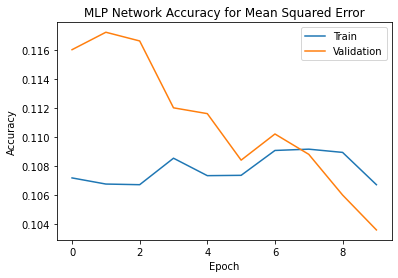

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP Network Accuracy for Mean Squared Error')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

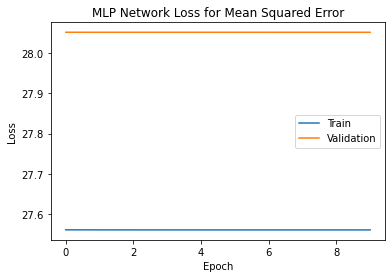

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP Network Loss for Mean Squared Error')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

**Calculate accuracy, loss and confusion matrix for test data:**

Loss = 27.610
Accuracy = 0.106
313/313 [==============================] - 1s 3ms/step


Text(0.5, 1.0, 'Confusion matrix for Mean Squared Error')

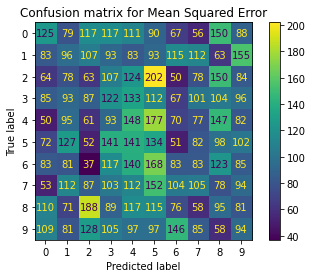

In [ ]:
test_loss, test_acc = Network.evaluate(x_test, y_test, verbose = 0)
print('Loss = %.3f' %test_loss)
print('Accuracy = %.3f' %test_acc)

y_pred = Network.predict(x_test)
y_pred = y_pred.argmax(1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix for Mean Squared Error')

## **Part 4.**

**State (1):**

Optimizer = Adam

In [ ]:
Network = Sequential()
Network.add(Flatten())                                             # Input layer
Network.add(Dense(128, input_dim = 32*32*3, activation = 'relu'))  # Hidden layer 1
Network.add(Dense(128, activation = 'relu'))                       # Hidden layer 2
Network.add(Dense(10, activation = 'softmax'))                     # Output layer

In [ ]:
Network.compile(optimizer = keras.optimizers.Adam(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Network.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_data = (x_valid, y_valid))

Epoch 1/10
176/176 [==============================] - 5s 27ms/step - loss: 2.6278 - accuracy: 0.1948 - val_loss: 2.0277 - val_accuracy: 0.2360
Epoch 2/10
176/176 [==============================] - 3s 18ms/step - loss: 1.9697 - accuracy: 0.2568 - val_loss: 1.9361 - val_accuracy: 0.2692
Epoch 3/10
176/176 [==============================] - 3s 18ms/step - loss: 1.9411 - accuracy: 0.2638 - val_loss: 1.9773 - val_accuracy: 0.2592
Epoch 4/10
176/176 [==============================] - 3s 18ms/step - loss: 1.9304 - accuracy: 0.2697 - val_loss: 1.9177 - val_accuracy: 0.2734
Epoch 5/10
176/176 [==============================] - 4s 21ms/step - loss: 1.9257 - accuracy: 0.2716 - val_loss: 1.9422 - val_accuracy: 0.2648
Epoch 6/10
176/176 [==============================] - 3s 18ms/step - loss: 1.9165 - accuracy: 0.2744 - val_loss: 1.9163 - val_accuracy: 0.2854
Epoch 7/10
176/176 [==============================] - 3s 18ms/step - loss: 1.9157 - accuracy: 0.2765 - val_loss: 1.9167 - val_accuracy: 0.2722

**PLotting accuracy and loss for train and validation data:**

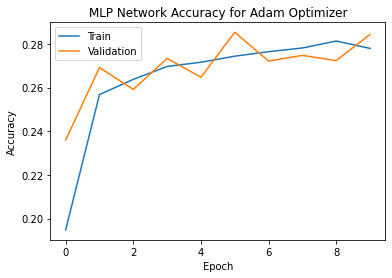

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP Network Accuracy for Adam Optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

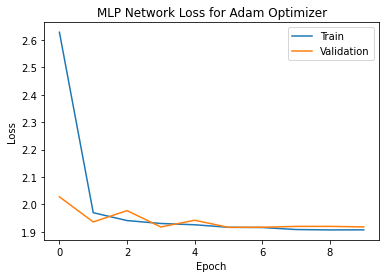

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP Network Loss for Adam Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

**State (2):**

Optimizer = Adadelta

In [ ]:
Network = Sequential()
Network.add(Flatten())                                             # Input layer
Network.add(Dense(128, input_dim = 32*32*3, activation = 'relu'))  # Hidden layer 1
Network.add(Dense(128, activation = 'relu'))                       # Hidden layer 2
Network.add(Dense(10, activation = 'softmax'))                     # Output layer

In [ ]:
Network.compile(optimizer = keras.optimizers.Adadelta(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Network.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_data = (x_valid, y_valid))

Epoch 1/10
176/176 [==============================] - 4s 19ms/step - loss: 2.2261 - accuracy: 0.1914 - val_loss: 2.1501 - val_accuracy: 0.2456
Epoch 2/10
176/176 [==============================] - 3s 18ms/step - loss: 2.0947 - accuracy: 0.2668 - val_loss: 2.0599 - val_accuracy: 0.2816
Epoch 3/10
176/176 [==============================] - 3s 18ms/step - loss: 2.0189 - accuracy: 0.2979 - val_loss: 2.0021 - val_accuracy: 0.3094
Epoch 4/10
176/176 [==============================] - 3s 18ms/step - loss: 1.9688 - accuracy: 0.3165 - val_loss: 1.9625 - val_accuracy: 0.3140
Epoch 5/10
176/176 [==============================] - 3s 18ms/step - loss: 1.9330 - accuracy: 0.3284 - val_loss: 1.9355 - val_accuracy: 0.3292
Epoch 6/10
176/176 [==============================] - 3s 18ms/step - loss: 1.9052 - accuracy: 0.3383 - val_loss: 1.9080 - val_accuracy: 0.3346
Epoch 7/10
176/176 [==============================] - 3s 18ms/step - loss: 1.8827 - accuracy: 0.3462 - val_loss: 1.8910 - val_accuracy: 0.3366

**PLotting accuracy and loss for train and validation data:**

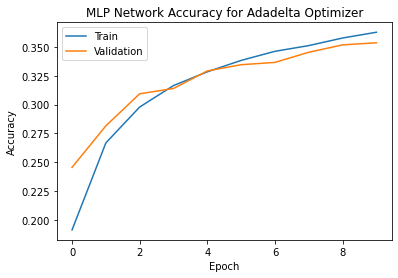

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP Network Accuracy for Adadelta Optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

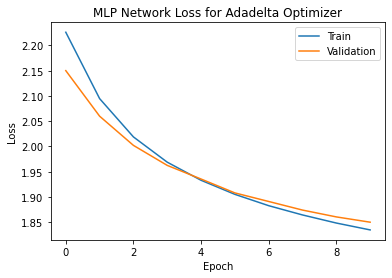

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP Network Loss for Adadelta Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

**State (3):**

Optimizer = Adagrad

In [ ]:
Network = Sequential()
Network.add(Flatten())                                             # Input layer
Network.add(Dense(128, input_dim = 32*32*3, activation = 'relu'))  # Hidden layer 1
Network.add(Dense(128, activation = 'relu'))                       # Hidden layer 2
Network.add(Dense(10, activation = 'softmax'))                     # Output layer

In [ ]:
Network.compile(optimizer = keras.optimizers.Adagrad(learning_rate = lr), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Network.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_data = (x_valid, y_valid))

Epoch 1/10
176/176 [==============================] - 4s 18ms/step - loss: 2.0365 - accuracy: 0.2619 - val_loss: 1.9167 - val_accuracy: 0.3200
Epoch 2/10
176/176 [==============================] - 4s 21ms/step - loss: 1.8489 - accuracy: 0.3441 - val_loss: 1.8441 - val_accuracy: 0.3430
Epoch 3/10
176/176 [==============================] - 3s 17ms/step - loss: 1.7733 - accuracy: 0.3728 - val_loss: 1.7619 - val_accuracy: 0.3794
Epoch 4/10
176/176 [==============================] - 4s 25ms/step - loss: 1.7232 - accuracy: 0.3908 - val_loss: 1.7057 - val_accuracy: 0.3940
Epoch 5/10
176/176 [==============================] - 3s 17ms/step - loss: 1.6840 - accuracy: 0.4057 - val_loss: 1.6994 - val_accuracy: 0.4032
Epoch 6/10
176/176 [==============================] - 3s 17ms/step - loss: 1.6560 - accuracy: 0.4159 - val_loss: 1.6514 - val_accuracy: 0.4218
Epoch 7/10
176/176 [==============================] - 3s 17ms/step - loss: 1.6266 - accuracy: 0.4263 - val_loss: 1.6296 - val_accuracy: 0.4270

**PLotting accuracy and loss for train and validation data:**

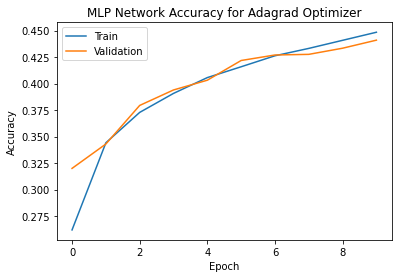

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP Network Accuracy for Adagrad Optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

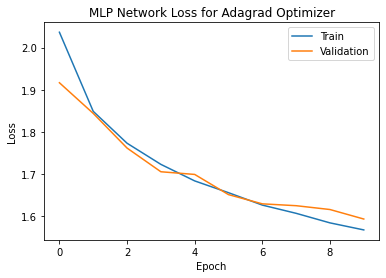

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP Network Loss for Adagrad Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

## **Part 5.**

**The best network:**

In [ ]:
Network = Sequential()
Network.add(Flatten())                                                # Input layer
Network.add(Dense(128, input_dim = 32*32*3, activation = 'relu'))     # Hidden layer 1
Network.add(Dense(128, activation = 'relu'))                          # Hidden layer 2
Network.add(Dense(10, activation = 'softmax'))                        # Output layer

In [ ]:
Network.compile(optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = landa), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Network.fit(x_train, y_train, epochs = 10, batch_size = 256, validation_data = (x_valid, y_valid))

Epoch 1/10
176/176 [==============================] - 4s 19ms/step - loss: 1.9274 - accuracy: 0.3042 - val_loss: 1.7931 - val_accuracy: 0.3626
Epoch 2/10
176/176 [==============================] - 3s 17ms/step - loss: 1.7322 - accuracy: 0.3849 - val_loss: 1.7079 - val_accuracy: 0.3856
Epoch 3/10
176/176 [==============================] - 3s 17ms/step - loss: 1.6540 - accuracy: 0.4118 - val_loss: 1.6655 - val_accuracy: 0.4144
Epoch 4/10
176/176 [==============================] - 3s 17ms/step - loss: 1.6018 - accuracy: 0.4340 - val_loss: 1.5732 - val_accuracy: 0.4500
Epoch 5/10
176/176 [==============================] - 3s 17ms/step - loss: 1.5600 - accuracy: 0.4466 - val_loss: 1.5976 - val_accuracy: 0.4480
Epoch 6/10
176/176 [==============================] - 3s 17ms/step - loss: 1.5233 - accuracy: 0.4615 - val_loss: 1.5319 - val_accuracy: 0.4640
Epoch 7/10
176/176 [==============================] - 3s 17ms/step - loss: 1.4912 - accuracy: 0.4720 - val_loss: 1.5813 - val_accuracy: 0.4484

**Accuracy and loss for test data:**

Loss = 1.474
Accuracy = 0.475
313/313 [==============================] - 1s 3ms/step


Text(0.5, 1.0, 'Confusion matrix for the best network')

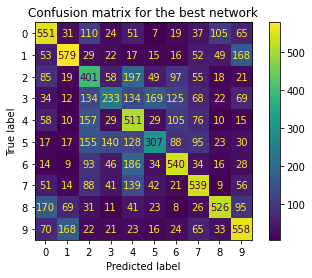

In [ ]:
test_loss, test_acc = Network.evaluate(x_test, y_test, verbose = 0)
print('Loss = %.3f' %test_loss)
print('Accuracy = %.3f' %test_acc)

y_pred = Network.predict(x_test)
y_pred = y_pred.argmax(1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion matrix for the best network')

**Precision, Recall and F-score:**

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_pred = Network.predict(x_test)
y_pred = y_pred.argmax(1)
Precision = precision_score(y_test, y_pred, average = None)
Recall = recall_score(y_test, y_pred, average = None)
F_score = f1_score(y_test, y_pred, average = None)
print('Precision for test data: ', Precision)
print('Recall for test data: ', Recall)
print('F-score for test data: ', F_score)

Precision_avg = precision_score(y_test, y_pred, average = 'weighted')
Recall_avg = recall_score(y_test, y_pred, average = 'weighted')
F_score_avg = f1_score(y_test, y_pred, average = 'weighted')
print('----------------------------------------------------')
print('Average of the parameters:')
print('Average Precision for test data: ', Precision_avg)
print('Average Recall for test data: ', Recall_avg)
print('Average F-score for test data: ', F_score_avg)

313/313 [==============================] - 1s 2ms/step
Precision for test data:  [0.49954669 0.62392241 0.32868852 0.3728     0.3580939  0.44428365
 0.5177373  0.5148042  0.648582   0.50497738]
Recall for test data:  [0.551 0.579 0.401 0.233 0.511 0.307 0.54  0.539 0.526 0.558]
F-score for test data:  [0.52401331 0.60062241 0.36126126 0.28676923 0.421096   0.36309876
 0.52863436 0.52662433 0.58089453 0.53016627]
----------------------------------------------------
Average of the parameters:
Average Precision for test data:  0.48134360512522045
Average Recall for test data:  0.4745
Average F-score for test data:  0.4723180468119497


## **Section B: CNN + MLP Network**

### **Part 1.**

### **Training the Network:**

In [ ]:
import numpy as np 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
Conv_Network = Sequential()

Conv_Network.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))   # first hidden layer

Conv_Network.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same'))                         # second hidden layer

Conv_Network.add(Flatten())
Conv_Network.add(Dense(128, input_dim = 32*32*3, activation='relu'))
Conv_Network.add(Dense(128, activation='relu'))
Conv_Network.add(Dense(10, activation = 'softmax'))

In [ ]:
lr = 1e-2
landa = 0.9
Conv_Network.compile(optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = landa), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Conv_Network.fit(x_train, y_train, epochs = 5, batch_size = 256, validation_data = (x_valid, y_valid))

Epoch 1/5
176/176 [==============================] - 266s 2s/step - loss: 1.7396 - accuracy: 0.3668 - val_loss: 1.4955 - val_accuracy: 0.4714
Epoch 2/5
176/176 [==============================] - 249s 1s/step - loss: 1.3568 - accuracy: 0.5098 - val_loss: 1.2761 - val_accuracy: 0.5434
Epoch 3/5
176/176 [==============================] - 248s 1s/step - loss: 1.1652 - accuracy: 0.5862 - val_loss: 1.1687 - val_accuracy: 0.5812
Epoch 4/5
176/176 [==============================] - 247s 1s/step - loss: 1.0085 - accuracy: 0.6450 - val_loss: 1.1051 - val_accuracy: 0.6144
Epoch 5/5
176/176 [==============================] - 247s 1s/step - loss: 0.8792 - accuracy: 0.6934 - val_loss: 1.0165 - val_accuracy: 0.6476


**PLotting accuracy and loss for train and validation data:**

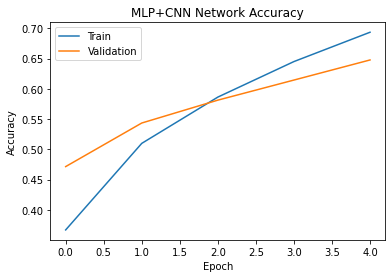

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP+CNN Network Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

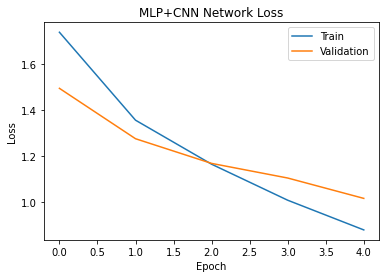

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP+CNN Network Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

**Accuracy and loss for test data:**

In [ ]:
test_loss, test_acc = Conv_Network.evaluate(x_test, y_test, verbose = 0)
print('Loss = %.3f' %test_loss)
print('Accuracy = %.3f' %test_acc)

Loss = 1.052
Accuracy = 0.635


### **Part 2.**

In [ ]:
Conv_Network = Sequential()

Conv_Network.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))   # first hidden layer
Conv_Network.add(BatchNormalization())
Conv_Network.add(MaxPooling2D((2, 2)))

Conv_Network.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))                         # second hidden layer
Conv_Network.add(BatchNormalization())
Conv_Network.add(MaxPooling2D((2, 2)))

Conv_Network.add(Flatten())
Conv_Network.add(Dense(128, input_dim = 32*32*3, activation='relu'))
Conv_Network.add(Dense(128, activation='relu'))
Conv_Network.add(Dense(10, activation = 'softmax'))

In [ ]:
Conv_Network.compile(optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = landa), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Conv_Network.fit(x_train, y_train, epochs = 5, batch_size = 256, validation_data = (x_valid, y_valid))

Epoch 1/5
176/176 [==============================] - 103s 583ms/step - loss: 1.4643 - accuracy: 0.4758 - val_loss: 1.6602 - val_accuracy: 0.4316
Epoch 2/5
176/176 [==============================] - 104s 588ms/step - loss: 1.0750 - accuracy: 0.6161 - val_loss: 1.3540 - val_accuracy: 0.5166
Epoch 3/5
176/176 [==============================] - 102s 581ms/step - loss: 0.8985 - accuracy: 0.6816 - val_loss: 1.1387 - val_accuracy: 0.6014
Epoch 4/5
176/176 [==============================] - 101s 575ms/step - loss: 0.7741 - accuracy: 0.7273 - val_loss: 1.3141 - val_accuracy: 0.5748
Epoch 5/5
176/176 [==============================] - 101s 577ms/step - loss: 0.6656 - accuracy: 0.7640 - val_loss: 1.3805 - val_accuracy: 0.5844


**PLotting accuracy and loss for train and validation data:**

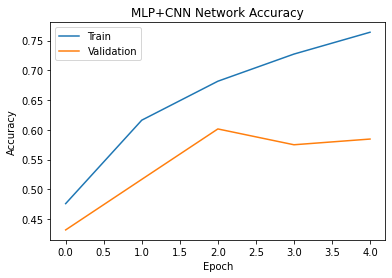

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP+CNN Network Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

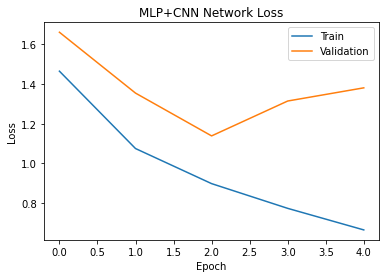

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP+CNN Network Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

**Accuracy and loss for test data:**

In [ ]:
test_loss, test_acc = Conv_Network.evaluate(x_test, y_test, verbose = 0)
print('Loss = %.3f' %test_loss)
print('Accuracy = %.3f' %test_acc)

Loss = 1.418
Accuracy = 0.565


### **Part 3.**

In [ ]:
Conv_Network = Sequential()

Conv_Network.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))   # first hidden layer
Conv_Network.add(BatchNormalization())
Conv_Network.add(MaxPooling2D((2, 2)))

Conv_Network.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))                         # second hidden layer
Conv_Network.add(BatchNormalization())
Conv_Network.add(MaxPooling2D((2, 2)))
Conv_Network.add(Dropout(0.001))

Conv_Network.add(Flatten())
Conv_Network.add(Dense(128, input_dim = 32*32*3, activation='relu'))
Conv_Network.add(Dense(128, activation='relu'))
Conv_Network.add(Dropout(0.01))
Conv_Network.add(Dense(10, activation = 'softmax'))

In [ ]:
Conv_Network.compile(optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = landa), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Conv_Network.fit(x_train, y_train, epochs = 5, batch_size = 256, validation_data = (x_valid, y_valid))

Epoch 1/5
176/176 [==============================] - 94s 533ms/step - loss: 1.4443 - accuracy: 0.4830 - val_loss: 1.6819 - val_accuracy: 0.4278
Epoch 2/5
176/176 [==============================] - 93s 526ms/step - loss: 1.0416 - accuracy: 0.6302 - val_loss: 1.2996 - val_accuracy: 0.5590
Epoch 3/5
176/176 [==============================] - 93s 527ms/step - loss: 0.8684 - accuracy: 0.6939 - val_loss: 1.2335 - val_accuracy: 0.5878
Epoch 4/5
176/176 [==============================] - 93s 526ms/step - loss: 0.7480 - accuracy: 0.7356 - val_loss: 0.9025 - val_accuracy: 0.6892
Epoch 5/5
176/176 [==============================] - 93s 527ms/step - loss: 0.6500 - accuracy: 0.7703 - val_loss: 1.2452 - val_accuracy: 0.6016


**PLotting accuracy and loss for train and validation data:**

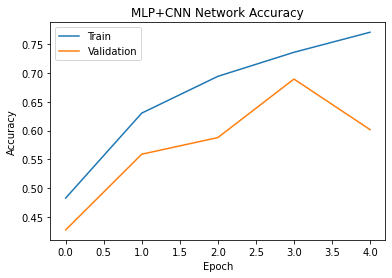

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP+CNN Network Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

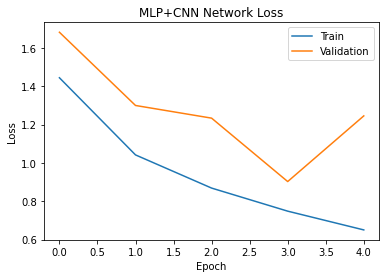

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP+CNN Network Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

**Accuracy and loss for test data:**

In [ ]:
test_loss, test_acc = Conv_Network.evaluate(x_test, y_test, verbose = 0)
print('Loss = %.3f' %test_loss)
print('Accuracy = %.3f' %test_acc)

Loss = 1.254
Accuracy = 0.595


### **Part 4.**

In [ ]:
Conv_Network = Sequential()

Conv_Network.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32,32,3)))   # first hidden layer
Conv_Network.add(BatchNormalization())
Conv_Network.add(MaxPooling2D((2, 2)))

Conv_Network.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))                         # second hidden layer
Conv_Network.add(BatchNormalization())
Conv_Network.add(MaxPooling2D((2, 2)))
Conv_Network.add(Dropout(0.001))

Conv_Network.add(Flatten())
Conv_Network.add(Dense(128, input_dim = 32*32*3, activation='relu'))
Conv_Network.add(Dense(128, activation='relu'))
Conv_Network.add(Dropout(0.01))
Conv_Network.add(Dense(10, activation = 'softmax'))

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)
Conv_Network.compile(optimizer = keras.optimizers.SGD(learning_rate = lr, momentum = landa), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = Conv_Network.fit(x_train, y_train, epochs = 30, batch_size = 256, validation_data = (x_valid, y_valid), callbacks=[early_stopping])

Epoch 1/30
176/176 [==============================] - 92s 519ms/step - loss: 1.4802 - accuracy: 0.4680 - val_loss: 1.5762 - val_accuracy: 0.4688
Epoch 2/30
176/176 [==============================] - 92s 524ms/step - loss: 1.0794 - accuracy: 0.6170 - val_loss: 1.3469 - val_accuracy: 0.5166
Epoch 3/30
176/176 [==============================] - 94s 532ms/step - loss: 0.9117 - accuracy: 0.6767 - val_loss: 1.0958 - val_accuracy: 0.6176
Epoch 4/30
176/176 [==============================] - 92s 522ms/step - loss: 0.7974 - accuracy: 0.7188 - val_loss: 1.0379 - val_accuracy: 0.6384
Epoch 5/30
176/176 [==============================] - 92s 521ms/step - loss: 0.7019 - accuracy: 0.7525 - val_loss: 1.0382 - val_accuracy: 0.6380
Epoch 6/30
176/176 [==============================] - 93s 529ms/step - loss: 0.6106 - accuracy: 0.7865 - val_loss: 1.3350 - val_accuracy: 0.5784
Epoch 7/30
176/176 [==============================] - 92s 520ms/step - loss: 0.5211 - accuracy: 0.8181 - val_loss: 1.2116 - val_ac

**PLotting accuracy and loss for train and validation data:**

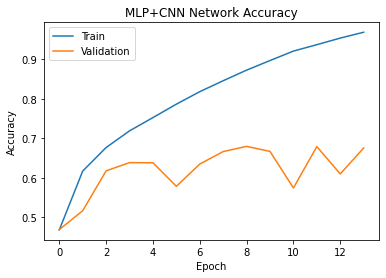

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('MLP+CNN Network Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

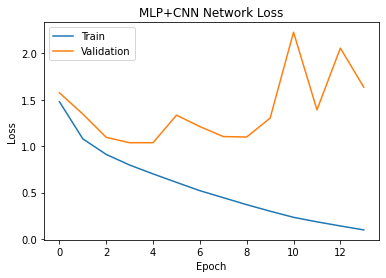

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('MLP+CNN Network Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'])
plt.show()

**Accuracy and loss for test data:**

In [ ]:
test_loss, test_acc = Conv_Network.evaluate(x_test, y_test, verbose = 0)
print('Loss = %.3f' %test_loss)
print('Accuracy = %.3f' %test_acc)

Loss = 1.615
Accuracy = 0.676
